We want to study the possibility of saving both energy and money with a different approach in terms of task management. To do so we'll make a couple of assumptions related to thermal distribution and power efficiency throughout the whole rack and nodes system.

In [2]:
# Importing packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime, timedelta
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.seasonal import STL
import matplotlib.ticker as ticker
from matplotlib.colors import LinearSegmentedColormap

In [28]:
# Dataset import from CSV file -> each sample is in kWh
dataset_E = pd.read_csv('../E_Dataset.csv', index_col=0, parse_dates=True)
dataset_E

,r205n01,r205n02,r205n03,r205n04,r205n05,r205n06,r205n07,r205n08,r205n09,r205n10,...,r256n11,r256n12,r256n13,r256n14,r256n15,r256n16,r256n17,r256n18,r256n19,r256n20
timestamp,,,,,,,,,,,,,,,,,,,,,
2020-05-02 17:00:00,0.530882,0.020000,0.529444,0.550606,0.577949,0.528611,0.568571,0.669487,0.574857,0.547297,...,0.512000,0.525294,0.530294,0.527838,0.521143,0.530286,0.526757,0.561316,0.539706,0.526000
2020-05-02 18:00:00,0.532026,0.020000,0.529043,0.548348,0.575651,0.527948,0.571402,0.667742,0.573163,0.546831,...,0.511357,0.527112,0.530397,0.527296,0.520332,0.530313,0.527160,0.562404,0.539750,0.524766
2020-05-02 19:00:00,0.541963,0.020000,0.532534,0.554684,0.581221,0.527630,0.571128,0.670140,0.573512,0.547244,...,0.511393,0.525655,0.530244,0.528171,0.520270,0.530186,0.525209,0.560955,0.537385,0.525631
2020-05-02 20:00:00,0.544268,0.020000,0.532655,0.557142,0.586214,0.529119,0.571604,0.674413,0.576784,0.547738,...,0.511757,0.527206,0.530570,0.527978,0.520716,0.530500,0.524167,0.560611,0.537646,0.525149
2020-05-02 21:00:00,0.542884,0.020000,0.533145,0.556479,0.587118,0.528839,0.572772,0.675122,0.576477,0.548337,...,0.512916,0.529028,0.530597,0.529075,0.522042,0.530186,0.527420,0.563308,0.539428,0.525097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-28 18:00:00,0.532970,0.541556,0.526485,0.550389,0.576043,0.520783,0.571000,0.549944,0.566535,0.535333,...,1.204111,0.841996,1.155944,1.583000,0.869056,1.193556,0.779056,0.745944,1.196444,1.255889
2022-09-28 19:00:00,0.533333,0.541111,0.527333,0.550611,0.577056,0.520333,0.567500,0.549333,0.567056,0.536278,...,1.205000,0.703944,1.173000,1.593167,0.868833,1.196000,0.670000,0.635778,1.201000,1.251611
2022-09-28 20:00:00,0.532556,0.541278,0.526556,0.548944,0.575722,0.520889,0.570000,0.550444,0.566167,0.535611,...,1.203944,0.863444,1.175167,1.587444,0.708833,1.195556,0.610889,0.902000,1.195222,1.245722


In [4]:
# Dataset import from CSV file
dataset_TEMP_in = pd.read_csv('../TemperatureDataset_inlet.csv', index_col=0, parse_dates=True)
dataset_TEMP_out = pd.read_csv('../TemperatureDataset_outlet.csv', index_col=0, parse_dates=True)

In [5]:
# Creation of individual nodes' datasets
dataset_TEMP_in_nodes = pd.DataFrame()
dataset_TEMP_in_mean_nodes = pd.Series()

dataset_TEMP_out_nodes = pd.DataFrame()
dataset_TEMP_out_mean_nodes = pd.Series()

for i in range(1, 21):
    if (i < 10):
        node_nbr = "n0" + str(i)
    else:
        node_nbr = "n" + str(i)
    node_in = [col for col in dataset_TEMP_in.columns if node_nbr in col]
    if not node_in:
        continue # Skipping a cycle if the node number isn't present
    new_node = dataset_TEMP_in[node_in].mean(axis=1)
    dataset_TEMP_in_nodes[node_nbr] = new_node
    dataset_TEMP_in_mean_nodes[node_nbr] = dataset_TEMP_in_nodes[node_nbr].mean()

for i in range(1, 21):
    if (i < 10):
        node_nbr = "n0" + str(i)
    else:
        node_nbr = "n" + str(i)
    node_out = [col for col in dataset_TEMP_out.columns if node_nbr in col]
    if not node_out:
        continue # Skipping a cycle if the node number isn't present
    new_node = dataset_TEMP_out[node_out].mean(axis=1)
    dataset_TEMP_out_nodes[node_nbr] = new_node
    dataset_TEMP_out_mean_nodes[node_nbr] = dataset_TEMP_out_nodes[node_nbr].mean()

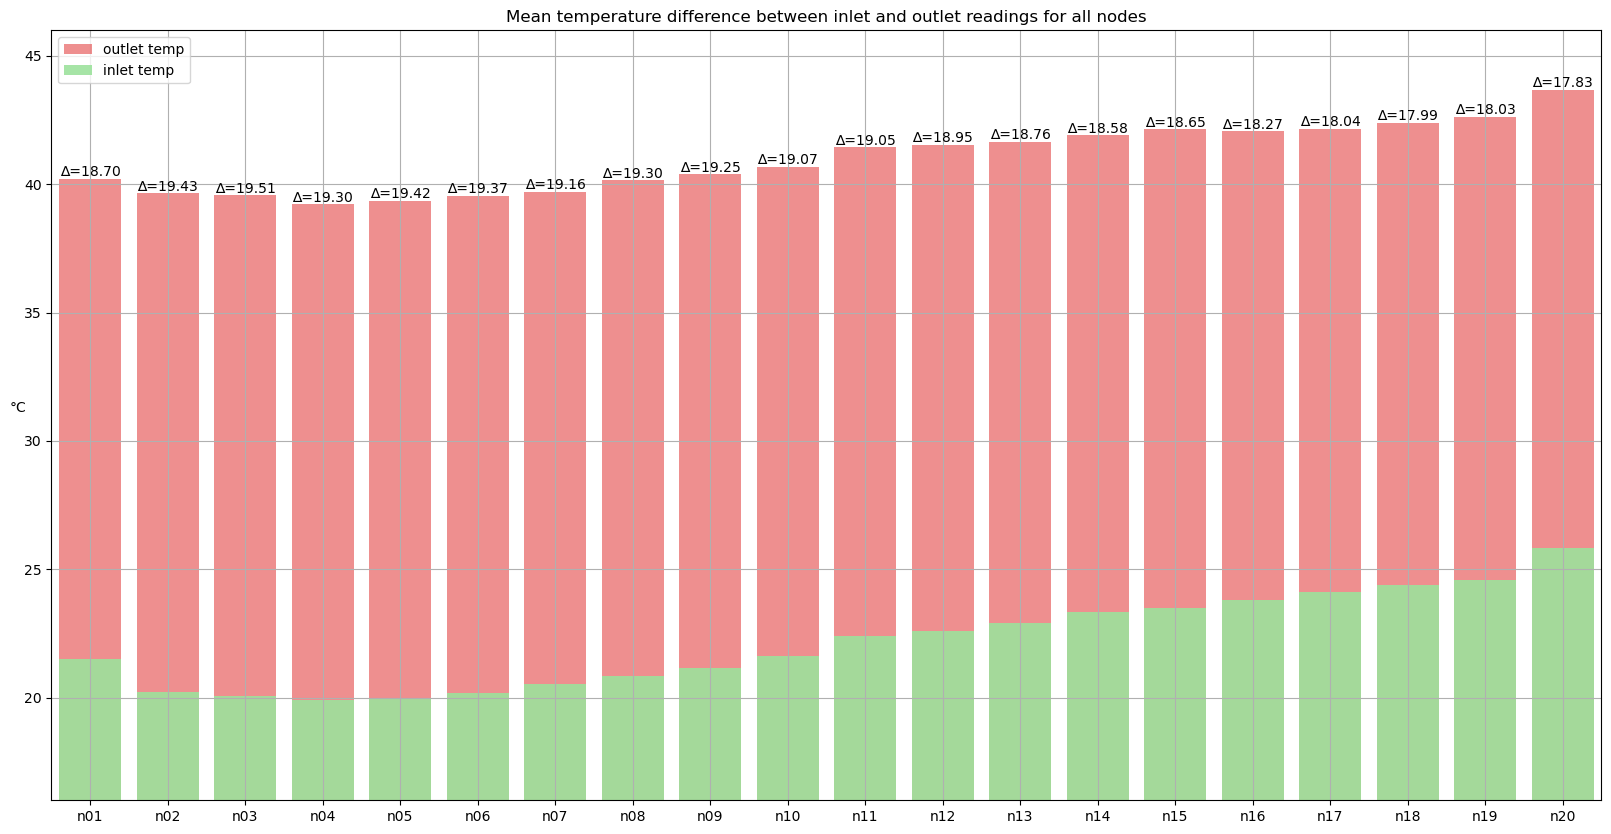

In [6]:
difference = dataset_TEMP_out_mean_nodes.values - dataset_TEMP_in_mean_nodes.values

# Temperature distance plotting
fig, ax = plt.subplots(figsize=(20,10))

# Creating a colormap
sns.barplot(x=dataset_TEMP_out_mean_nodes.index, y=dataset_TEMP_out_mean_nodes.values, ax=ax, color='red', alpha=0.5, label='outlet temp')
sns.barplot(x=dataset_TEMP_in_mean_nodes.index, y=dataset_TEMP_in_mean_nodes.values, ax=ax, color='lightgreen', alpha=0.9, label='inlet temp')

plt.grid(True)

plt.ylabel('°C', rotation=0)
plt.title("Mean temperature difference between inlet and outlet readings for all nodes")
plt.legend(loc=2)
ax.set_ylim(16, 46)

for i in range(len(dataset_TEMP_out_mean_nodes)):
    plt.text(i, dataset_TEMP_out_mean_nodes.iloc[i] + 0.1, f'∆={difference[i]:.2f}', ha='center')

#plt.savefig('../PLOTS/TEMP_difference_plot.png', dpi=300)
plt.show()

The difference in terms of input and output temperature doesn't change that much between nodes, for this (and others) reason we assume that the distribution of work throughout the nodes is more or less balanced; this means that a different approach in work assignment might actually positively impact the overall power consumption. (Subtracting work from higher nodes and assigning it to lower nodes might be helpful)

To further prove this assumption we can see a very low standard deviation in the array that contains the difference between inlet and output temperature for each node.

In [7]:
difference = pd.Series(difference)
difference.describe()

count    20.000000
mean     18.834106
std       0.547412
min      17.834951
25%      18.504014
50%      19.002736
75%      19.298619
max      19.511229
dtype: float64

In [38]:
# Creation of individual nodes' dataset
dataset_E_nodes = pd.DataFrame()
dataset_E_mean_nodes = pd.Series()

for i in range(1, 21):
    if (i < 10):
        node_nbr = "n0" + str(i)
    else:
        node_nbr = "n" + str(i)
    node = [col for col in dataset_E.columns if node_nbr in col]
    if not node:
        continue # Skipping a cycle if the node number isn't present
    new_node = dataset_E[node].mean(axis=1)
    dataset_E_nodes[node_nbr] = new_node
    dataset_E_mean_nodes[node_nbr] = dataset_E_nodes[node_nbr].mean()

For ease of computation we'll try to make our computations just using the average values we got so far, multipling our results by 20, considering each node of a certain number is present in one of the 20 racks.

The most energy-consuming and warm nodes are the higher ones, for this reason we'll consider the last four [n17, n18, n19, n20], substituting their average energy consumption with the average value taken from the whole server, which is equal to 0.8161080858605112.

### Approximation using average values for the nodes

In [31]:
average_energy = dataset_E_mean_nodes.describe()['mean']
dataset_E_mean_nodes_new = dataset_E_mean_nodes.copy()

for node in range(17, 21):
    node_nbr = 'n' + str(node)
    dataset_E_mean_nodes_new[node_nbr] = average_energy

dataset_E_mean_nodes_new

n01    0.825147
n02    0.821774
n03    0.812483
n04    0.813415
n05    0.809732
n06    0.811860
n07    0.807451
n08    0.805294
n09    0.812328
n10    0.812354
n11    0.807609
n12    0.812359
n13    0.814892
n14    0.814298
n15    0.815719
n16    0.815985
n17    0.816108
n18    0.816108
n19    0.816108
n20    0.816108
dtype: float64

c:\Users\loren\miniconda3\envs\DeepLearning\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\loren\miniconda3\envs\DeepLearning\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\loren\miniconda3\envs\DeepLearning\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\loren\miniconda3\envs\DeepLearning\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and wil

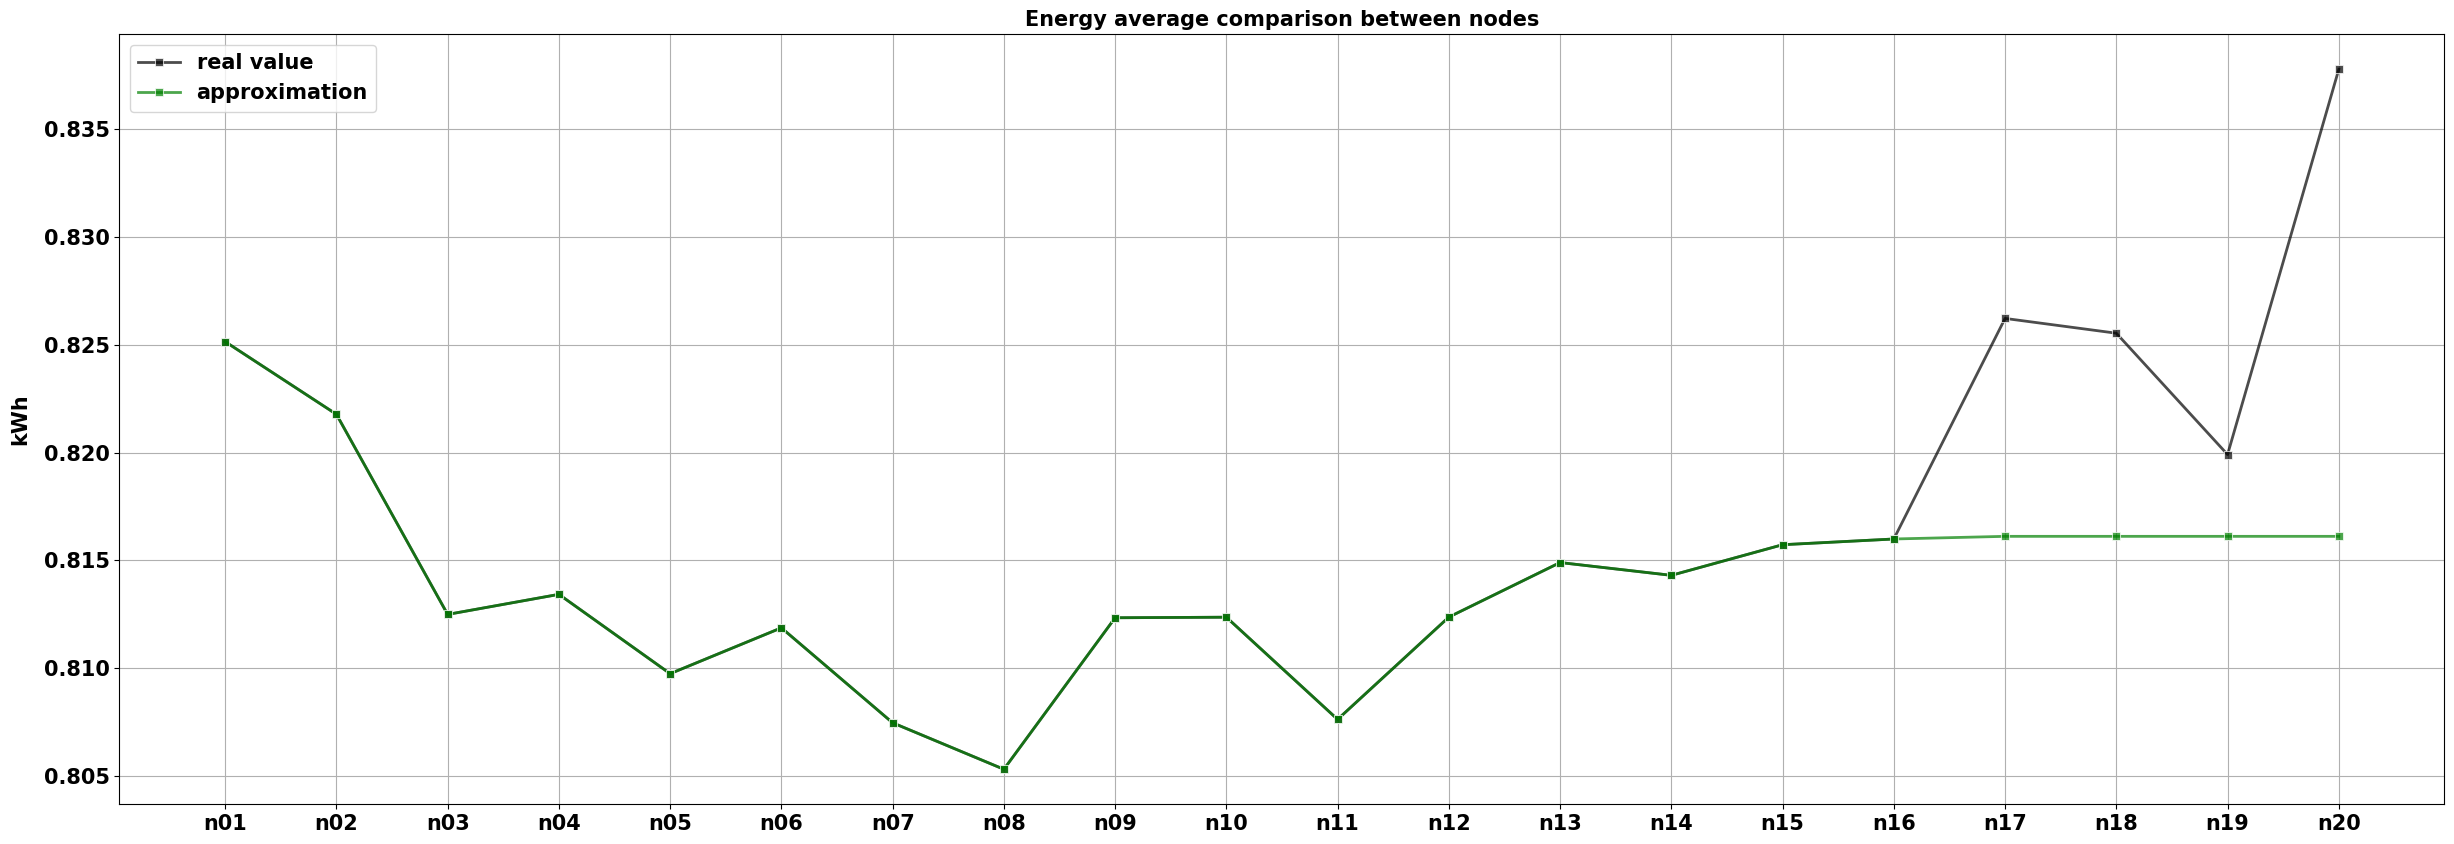

In [40]:
# Plotting the comparison
fig, ax = plt.subplots(figsize=(30,10))

sns.lineplot(data=dataset_E_mean_nodes, ax=ax, c='black', linewidth=2, alpha=0.7, marker='s', label='real value')
sns.lineplot(data=dataset_E_mean_nodes_new, ax=ax, c='green', linewidth=2, alpha=0.7, marker='s', label='approximation')
plt.grid(True)
plt.gca().yaxis.labelpad = 10
plt.xticks(fontweight='bold', fontsize=15)
plt.yticks(fontweight='bold', fontsize=15)
plt.ylabel('kWh', fontweight='bold', fontsize=15)
plt.title("Energy average comparison between nodes", fontweight='bold', fontsize=15)
ax.set_ylim()
plt.legend(prop={'weight': 'bold', 'size': 15})

#plt.savefig('../PLOTS/E_saving.png', dpi=300)
plt.show()

In [52]:
avg_diff = dataset_E_mean_nodes.sum(axis=0) - dataset_E_mean_nodes_new.sum(axis=0)
avg_diff_rack = avg_diff * 20
avg_diff_day = avg_diff_rack * 24
avg_diff_year = avg_diff_day * 365

print(f'Yearly energy saving (computed from the average values) in kWh: {avg_diff_year}')

Yearly energy saving (computed from the average values) in kWh: 7889.083502725379


### Approximation using the hourly values of the nodes

In [72]:
dataset_E_nodes_new = dataset_E_nodes.copy()

for index, row in dataset_E_nodes_new.iterrows():
    row_avg = row.mean()
    for node in ['n17', 'n18', 'n19', 'n20']:
        row[node] = row_avg

dataset_E_nodes_new

,n01,n02,n03,n04,n05,n06,n07,n08,n09,n10,n11,n12,n13,n14,n15,n16,n17,n18,n19,n20
timestamp,,,,,,,,,,,,,,,,,,,,
2020-05-02 17:00:00,0.666622,0.646572,0.659654,0.656799,0.650544,0.658938,0.656901,0.651287,0.661914,0.657697,0.652114,0.659486,0.642959,0.645820,0.649427,0.655660,0.650552,0.650552,0.650552,0.650552
2020-05-02 18:00:00,0.679561,0.661060,0.672599,0.672369,0.665094,0.674158,0.671303,0.668662,0.662356,0.665606,0.659114,0.666003,0.652955,0.658910,0.657520,0.665281,0.662079,0.662079,0.662079,0.662079
2020-05-02 19:00:00,0.634921,0.615382,0.627793,0.627452,0.619322,0.628973,0.626860,0.623588,0.616841,0.617953,0.614417,0.618848,0.613351,0.628179,0.625187,0.633829,0.620745,0.620745,0.620745,0.620745
2020-05-02 20:00:00,0.655359,0.632643,0.645260,0.645225,0.639012,0.646566,0.643542,0.639058,0.634736,0.637440,0.632221,0.638441,0.630254,0.645931,0.644208,0.653034,0.636879,0.636879,0.636879,0.636879
2020-05-02 21:00:00,0.688409,0.666580,0.677369,0.677294,0.671109,0.680318,0.676593,0.674275,0.669297,0.667447,0.667530,0.671519,0.663160,0.681026,0.678583,0.684734,0.667879,0.667879,0.667879,0.667879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-28 18:00:00,0.927343,0.841744,0.916769,0.899117,0.874345,0.904755,0.888212,0.848931,0.915712,0.904223,0.873450,0.884416,1.010170,0.905615,0.854001,0.898215,0.898354,0.898354,0.898354,0.898354
2022-09-28 19:00:00,0.930933,0.840879,0.925355,0.896582,0.875255,0.909020,0.875625,0.841722,0.934304,0.910263,0.853096,0.890697,1.019272,0.920931,0.871628,0.905430,0.898266,0.898266,0.898266,0.898266
2022-09-28 20:00:00,0.932502,0.862495,0.946531,0.926133,0.902993,0.918156,0.905834,0.861525,0.923871,0.908446,0.900541,0.874738,1.032126,0.934871,0.896214,0.904218,0.910205,0.910205,0.910205,0.910205


In [98]:
# Energy difference computation 
E_diff = pd.Series((dataset_E_nodes - dataset_E_nodes_new).sum(axis=1)) # We get a single column containing the difference of the single energy samples

E_diff

timestamp
2020-05-02 17:00:00   -0.063567
2020-05-02 18:00:00   -0.059286
2020-05-02 19:00:00   -0.040971
2020-05-02 20:00:00   -0.072866
2020-05-02 21:00:00   -0.109183
                         ...   
2022-09-28 18:00:00    0.026641
2022-09-28 19:00:00   -0.028734
2022-09-28 20:00:00   -0.067917
2022-09-28 21:00:00   -0.117948
2022-09-28 22:00:00   -0.110568
Length: 21102, dtype: float64

In [99]:
tot_diff_rack = E_diff.sum(axis=0) 
tot_diff_node = tot_diff_rack * 20
tot_diff_node_year = tot_diff_node / 2.5

print(f'Yearly energy saving (computed with individual samples) in kWh: {tot_diff_node_year}')

Yearly energy saving (computed with individual samples) in kWh: 7601.618268242732


### Energy cost dataset and Saving computation

In [89]:
dataset_E_cost = pd.read_csv('../Energy_cost_Italy.csv')
dataset_E_cost.drop(columns=['Country', 'ISO3 Code', 'Datetime (Local)'], inplace=True)
dataset_E_cost['Datetime (UTC)'] = pd.to_datetime(dataset_E_cost['Datetime (UTC)'])

dataset_E_cost = dataset_E_cost[(dataset_E_cost['Datetime (UTC)'] > '2020-05-02 16:00:00')]
dataset_E_cost = dataset_E_cost[(dataset_E_cost['Datetime (UTC)'] < '2022-09-28 23:00:00')]
dataset_E_cost.set_index('Datetime (UTC)', inplace=True)

dataset_E_cost

,Price (EUR/MWhe)
Datetime (UTC),
2020-05-02 17:00:00,33.00
2020-05-02 18:00:00,34.94
2020-05-02 19:00:00,33.00
2020-05-02 20:00:00,25.00
2020-05-02 21:00:00,23.49
...,...
2022-09-28 18:00:00,510.00
2022-09-28 19:00:00,419.99
2022-09-28 20:00:00,371.34


In [101]:
# CASE 1:
avg_diff_year_MWh = avg_diff_year / 1000
avg_diff_year_MWh * dataset_E_cost['Price (EUR/MWhe)'].mean()

1286.2816948419843

In [106]:
# CASE 2:
E_diff_MWh = E_diff * 20 / 1000
E_diff_EUR = E_diff_MWh * dataset_E_cost['Price (EUR/MWhe)']
print(E_diff_EUR.sum(axis=0)) # For 2.5 years
print(E_diff_EUR.sum(axis=0) / 2.5) # For 1 year


4013.158995690515
1605.263598276206
